In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
%matplotlib inline

# Reading the Trip_Data and Trip_Fare

In [2]:
data = pd.read_csv('trip_data_4/trip_data_4.csv') #original data

C:\Users\ajay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_short = pd.read_csv('trip_data_4/trip_data_4.csv', nrows= 1000000) #file with 1000000 lines

In [4]:
fare = pd.read_csv('trip_fare_4/trip_fare_4.csv')

In [5]:
fare_short  = pd.read_csv('trip_fare_4/trip_fare_4.csv', nrows = 1000000)

In [6]:
data_short.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
medallion              1000000 non-null object
 hack_license          1000000 non-null object
 vendor_id             1000000 non-null object
 rate_code             1000000 non-null int64
 store_and_fwd_flag    447554 non-null object
 pickup_datetime       1000000 non-null object
 dropoff_datetime      1000000 non-null object
 passenger_count       1000000 non-null int64
 trip_time_in_secs     1000000 non-null int64
 trip_distance         1000000 non-null float64
 pickup_longitude      1000000 non-null float64
 pickup_latitude       1000000 non-null float64
 dropoff_longitude     1000000 non-null float64
 dropoff_latitude      1000000 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 106.8+ MB


In [13]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082


In [7]:
fare_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
medallion           1000000 non-null object
 hack_license       1000000 non-null object
 vendor_id          1000000 non-null object
 pickup_datetime    1000000 non-null object
 payment_type       1000000 non-null object
 fare_amount        1000000 non-null float64
 surcharge          1000000 non-null float64
 mta_tax            1000000 non-null float64
 tip_amount         1000000 non-null float64
 tolls_amount       1000000 non-null float64
 total_amount       1000000 non-null float64
dtypes: float64(6), object(5)
memory usage: 83.9+ MB


In [14]:
fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.0,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.0,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.0,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.0,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.0,19.20


# Adding date features using pd.to_datetime()

In [15]:
data_short[' pickup_datetime'] = pd.to_datetime(data_short[' pickup_datetime'])

In [16]:
data_short['date'] = data_short[' pickup_datetime'].apply(lambda x: x.date()) #get the entire date

In [19]:
data_short['day'] = data_short[' pickup_datetime'].apply(lambda x: x.day_name()[:3]) #get name of day (Mon, Tue,...)

In [21]:
data_short['hour'] = data_short[' pickup_datetime'].apply(lambda x: x.hour)

In [40]:
fare_short[' pickup_datetime'] = pd.to_datetime(fare_short[' pickup_datetime'])

In [41]:
fare_short['day'] = fare_short[' pickup_datetime'].apply(lambda x: x.day_name()[:3])

# Distribution of Number of Passengers

In [8]:
data_short[' passenger_count'].value_counts()

1    685411
2    136506
5     66423
3     44837
6     44476
4     22345
0         2
Name:  passenger_count, dtype: int64

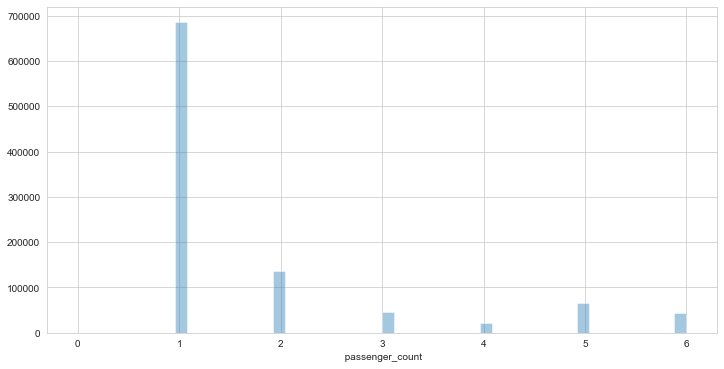

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.distplot(data_short[' passenger_count'], kde=False)

Distrubution shows maximum travelling passengers to be 1. Passenger_count of 5 and 6 indicate bigger taxis or possibilty of adults and a small child.
Intrestingly passenger_count of 4 has the least count in the graph lower than 5 and 6, maybe due to use of private car preffered for family or group 4.

# Distribution of Payment Type

In [25]:
fare_short[' payment_type'].value_counts()

CRD    516313
CSH    480679
NOC      2057
DIS       691
UNK       260
Name:  payment_type, dtype: int64

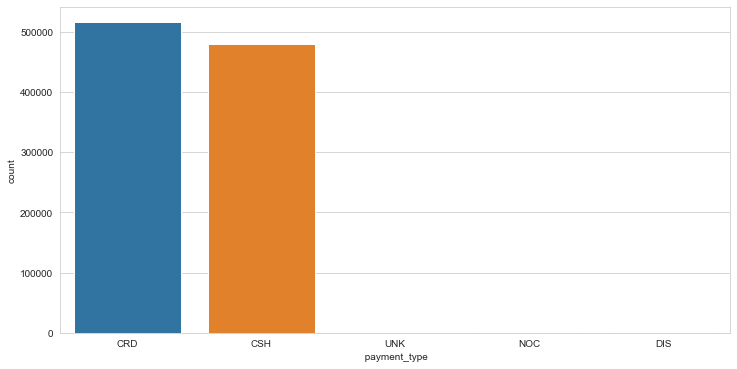

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(fare_short[' payment_type'])

Distribution shows the credit card to be most widely used mode of payment followed by cash. These are predominantly the most common modes of payment compared to NOC, UNK and DIS being used on few instances.

# Distribution of Fare Amount

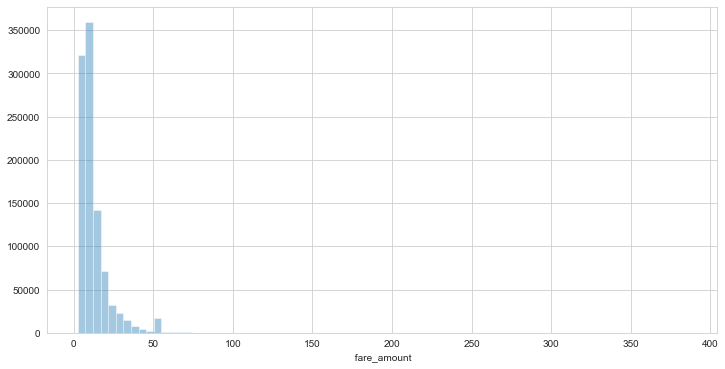

In [31]:
plt.figure(figsize=(12,6))
sns.distplot(fare_short[' fare_amount'], kde= False,bins=80)

In [191]:
fare_short[' fare_amount'].value_counts().head()

6.5    50492
6.0    50397
7.0    49758
5.5    48369
7.5    47715
Name:  fare_amount, dtype: int64

The distribution indicates that the passengers prefer using the cab for smaller amounts in range of 6-9. There is a decrease in the number of as the fare increases but a small increase in number at fare of 50. 

# Distribution of Tip Amount

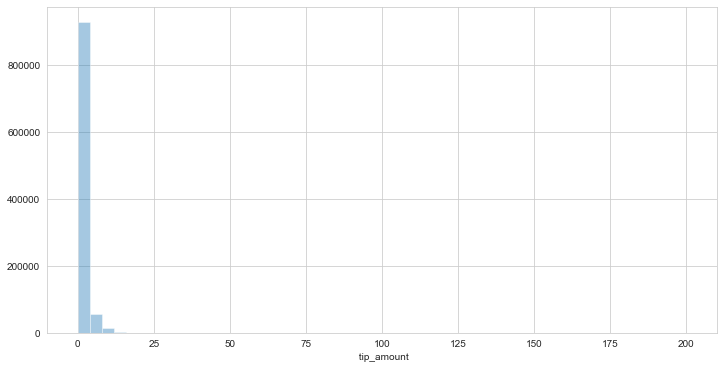

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(fare_short[' tip_amount'], kde= False)

In [38]:
fare_short[' tip_amount'].value_counts().head()

0.0    499874
1.0     88794
2.0     46780
1.5     37342
3.0     15860
Name:  tip_amount, dtype: int64

In [136]:
fare_short[' trip_time_in_secs'] = data_short[' trip_time_in_secs']

In [194]:
tip = fare_short.groupby(' tip_amount')[' trip_time_in_secs'].aggregate(np.mean).reset_index()
tip

,tip_amount,trip_time_in_secs
0,0.00,680.531480
1,0.01,727.332000
2,0.02,837.011364
3,0.03,692.095238
4,0.04,1288.473684
5,0.05,847.305085
6,0.06,940.692308
7,0.07,672.428571
8,0.08,872.519231
9,0.09,857.666667


Most passengesr do not tip the with 0.0 being the most common tip_amount. 

# Dsitrbution of Total Amount

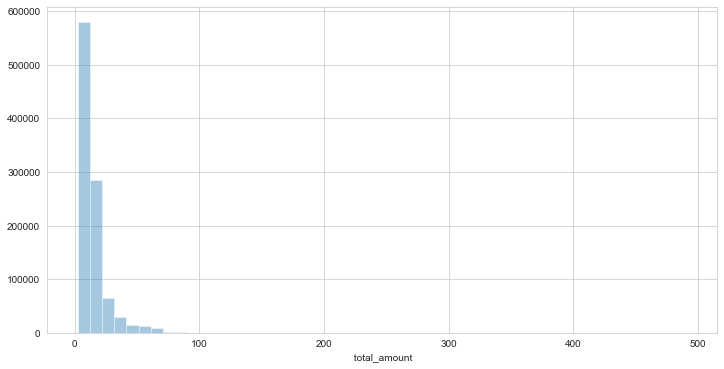

In [44]:
plt.figure(figsize=(12,6))
sns.distplot(fare_short[' total_amount'],kde=False)

In [45]:
fare_short[' total_amount'].value_counts().head()

6.5    35838
9.0    35651
8.0    34588
7.0    34188
7.5    33647
Name:  total_amount, dtype: int64

# EDA

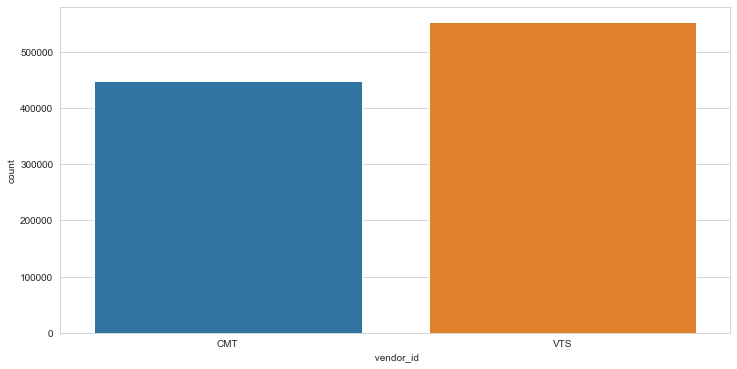

In [158]:
plt.figure(figsize=(12,6))
sns.countplot(data_short[' vendor_id'])

In [113]:
data_week = data_short.groupby('day')[' trip_time_in_secs'].aggregate(np.median).reset_index()

In [114]:
data_week

,day,trip_time_in_secs
0,Fri,656
1,Mon,604
2,Sat,600
3,Sun,561
4,Thu,654
5,Tue,599
6,Wed,616


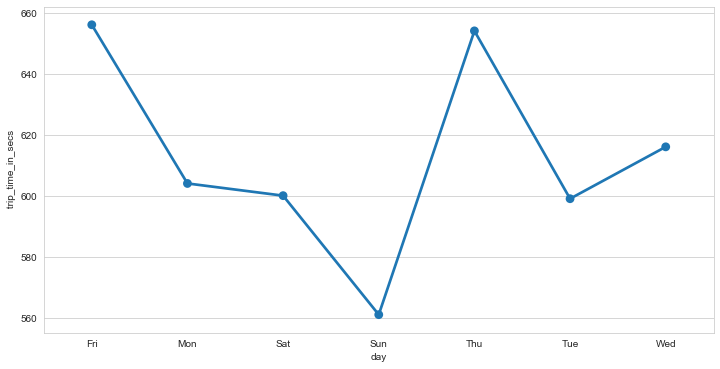

In [122]:
plt.figure(figsize=(12,6))
sns.pointplot(data_week['day'], data_week[' trip_time_in_secs'])

The duration of the trips as per the day of the week are maximum at Friday, Thurday and wednesday, with the least duration on sunday.

In [118]:
data_hour = data_short.groupby('hour')[' trip_time_in_secs'].aggregate(np.median).reset_index()

In [119]:
data_hour

,hour,trip_time_in_secs
0,0,600
1,1,600
2,2,568
3,3,544
4,4,589
5,5,540
6,6,480
7,7,515
8,8,552
9,9,540


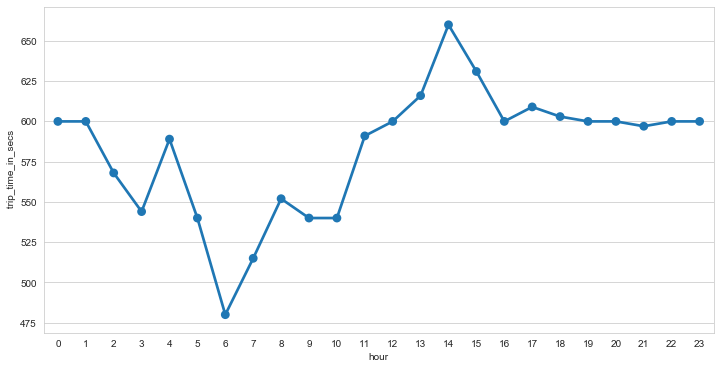

In [121]:
plt.figure(figsize=(12,6))
sns.pointplot(data_hour['hour'], data_hour[' trip_time_in_secs'])

The trip duration as per the hours of the days indicate a steady increase in duration from 10am to maximum at 2 pm with a decrease and a constant duration from 4pm to 11pm. The smalled duration is seen at 6am.

# 5 Bussiest Hours of the day

Feature engineering on data original dataset to find correct output

In [46]:
data[' pickup_datetime'] = pd.to_datetime(data[' pickup_datetime']) 

In [47]:
data['Date'] = data[' pickup_datetime'].apply(lambda x: x.date())

In [48]:
data['Hour'] = data[' pickup_datetime'].apply(lambda x: x.hour)

In [49]:
data_new = data.groupby(by=['Date','Hour']).count()[' vendor_id'].unstack() #create Date with date as index and hour as column

In [50]:
data_new.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-01,9087,5280,3377,2309,2667,4489,11080,19017,23611,23859,...,21736,22214,21739,25907,28795,28183,27550,26672,23057,16127
2013-04-02,11157,6281,3717,2470,2558,4321,11905,22513,27530,27400,...,25874,25298,21321,26388,33436,33920,33126,31328,27626,21305
2013-04-03,13772,7799,4768,3106,2855,4279,12402,24473,28862,28038,...,25989,24919,19847,24423,31639,34328,33901,33169,31414,24446
2013-04-04,15713,8996,5502,3515,3272,4490,12854,24936,29395,28080,...,26423,25079,20175,25729,32816,34612,34575,33849,32857,28834
2013-04-05,21712,14025,9163,6234,4793,4954,12457,23395,29155,27881,...,26003,23923,19446,24516,32048,35655,35525,34607,35749,35521


Heatmap to show bussiest hours

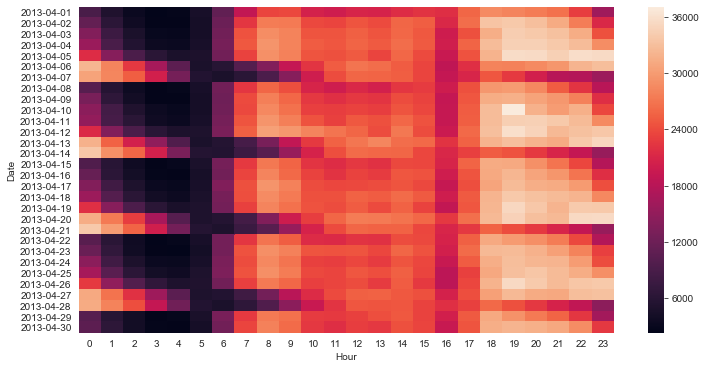

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(data_new)

The heatmap indiactes the most trips happen in between 6pm and 11pm. The trips increase on th early hours of sundays and mondays and reduce in between 6am to 10am on these days.

In [52]:
data_new.iloc[0].nlargest()

Hour
18    28795
19    28183
20    27550
21    26672
17    25907
Name: 2013-04-01, dtype: int64

In [53]:
counts = {}
for i in range(0,30):
    hours = data_new.iloc[i].nlargest()
    for j in hours.index:
        counts[j] = counts.get(j,0)+1

In [188]:
dict(sorted(counts.items(), key=operator.itemgetter(1), reverse=True)[:5])

{20: 26, 19: 25, 18: 24, 21: 20, 22: 19}

The 5 bussiest hourrs are 20,19,18,21 and 22

# Top 10 Bussiest Locations

In [59]:
list_coord =[]
for i in range(0,1000000):
    list_coord.append((round(data_short[' pickup_longitude'].iloc[i],2) , round(data_short[' pickup_latitude'].iloc[i],2)))

In [60]:
data_short['pickup_coord'] = list_coord

In [63]:
data_short['pickup_coord'].value_counts().head(10)

(-73.97, 40.76)    53549
(-73.99, 40.75)    52849
(-73.98, 40.76)    46498
(-73.98, 40.75)    45621
(-73.99, 40.76)    45107
(-73.99, 40.74)    44018
(-73.99, 40.73)    39857
(-74.0, 40.73)     35168
(-74.0, 40.74)     33195
(-73.98, 40.74)    31009
Name: pickup_coord, dtype: int64

In [64]:
import folium

In [65]:
m= folium.Map(location=[40.712776,-74.005974], zoom_start=13)

In [66]:
folium.Marker(location=[40.76,-73.97]).add_to(m)
folium.Marker(location=[40.75,-73.99]).add_to(m)
folium.Marker(location=[40.76, -73.98]).add_to(m)
folium.Marker(location=[40.75,-73.98]).add_to(m)
folium.Marker(location=[40.76, -73.99]).add_to(m)
folium.Marker(location=[40.74,-73.99]).add_to(m)
folium.Marker(location=[40.73,-73.99]).add_to(m)
folium.Marker(location=[40.73,-74.0]).add_to(m)
folium.Marker(location=[40.74,-74.0]).add_to(m)
folium.Marker(location=[40.74,-73.98]).add_to(m)
m

# Trip with most consistent fare

In [67]:
lst =[]
for i in range(0,1000000):
    lst.append((round(data_short[' pickup_longitude'].iloc[i],2), round(data_short[' pickup_latitude'].iloc[i],2), round(data_short[' dropoff_longitude'].iloc[i],2), round(data_short[' dropoff_latitude'].iloc[i],2)))
    

In [68]:
data_short['coord_trip'] = lst 

In [71]:
data_short['fare'] = fare_short[' fare_amount']

In [72]:
std = data_short.groupby('coord_trip')['fare']

In [73]:
std.std().dropna().sort_values().head()

coord_trip
(-73.79, 40.64, -73.96, 40.79)    0.0
(-73.78, 40.65, -73.93, 40.87)    0.0
(-73.96, 40.72, -73.89, 40.76)    0.0
(-73.78, 40.65, -73.93, 40.86)    0.0
(-73.96, 40.72, -73.9, 40.77)     0.0
Name: fare, dtype: float64

# Model to predict fare_amount and trip

In [74]:
data_short['day_num'] = data_short[' pickup_datetime'].apply(lambda x: x.dayofweek)

In [75]:
data_short['minute'] = data_short[' pickup_datetime'].apply(lambda x: x.minute)
data_short['second'] = data_short[' pickup_datetime'].apply(lambda x: x.second)

In [83]:
X = data_short[[' pickup_longitude',' pickup_latitude',' dropoff_longitude',' dropoff_latitude','hour','minute','second','day_num']]
y= fare_short[[' fare_amount',' tip_amount']]

In [78]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr_model = LinearRegression()

In [88]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
lr_predictions = lr_model.predict(X_test)

In [92]:
from sklearn import metrics

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))

MAE: 3.813752998233271
MSE: 50.687888780558644
RMSE: 7.119542736760462


# Average wage of taxi driver

In [127]:
data_avg = fare_short.groupby(' hack_license')[' total_amount'].mean().reset_index()

In [128]:
data_avg[' total_amount'].mean()

15.402042824020144

__1.As a driver target the busy hours from 18-23 for maximum pickups. 2.Target  the 11am to 2pm range for long duration trips especially on fridays,thurdays and wednesdays. 3.Stay close to the top busiest locations in the city.__

# On friday hour-0 locations with max pickups from

In [195]:
data_short[(data_short['day']== 'Fri') & (data_short['hour']==0)]['pickup_coord'].value_counts().head()

(-74.0, 40.73)     251
(-73.99, 40.72)    219
(-73.99, 40.73)    218
(-73.99, 40.76)    217
(-73.99, 40.74)    209
Name: pickup_coord, dtype: int64

# Function for top locations for pickup at the given day and hour

In [180]:
def busy_location(day,hour):
    busy_loc = data_short[(data_short['day']== day) & (data_short['hour']==hour)]['pickup_coord'].value_counts().head()
    x = folium.Map(location=[40.712776,-74.005974], zoom_start=13)
    for k,v in busy_loc.index:
        folium.Marker(location=[v,k]).add_to(x)
    return x

In [182]:
busy_location('Fri',0)